In [1]:
cd ../jecs

/Users/dan/Documents/GitHub/ExpPro/jecs


In [ ]:
#import libraries and files
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 
import torch
import os
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 
import numpy as np
import importlib
import dataset

In [ ]:
#chooses GPU if available
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")


Computation device: cpu



In [ ]:
directory_path = '/Users/dan/Downloads/download'
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path)]
file_paths

['/Users/dan/Downloads/download/QCD_Pt-470to600_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root',
 '/Users/dan/Downloads/download/TTJets_MSDecays_central_TuneZ2_7TeV-madgraph-tauola_merged.root',
 '/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']

In [ ]:
fp = ['/Users/dan/Downloads/download/QCD_Pt-470to600_TuneZ2_7TeV_pythia6_merged.root','/Users/dan/Downloads/download/TTJets_MSDecays_central_TuneZ2_7TeV-madgraph-tauola_merged.root']

pts_dataset = np.empty((0,), dtype=np.float32)
etas_dataset = np.empty((0,), dtype=np.float32)
area_dataset = np.empty((0,), dtype=np.float32)
npvs_dataset = np.empty((0,), dtype=np.int32)
gen_pts_dataset = np.empty((0,), dtype=np.float32)
jecs_dataset = np.empty((0,), dtype=np.float32)

for current_pts_dataset, current_etas_dataset, current_area_dataset, current_npvs_dataset, current_jecs_dataset in load_root_files(fp):
    pts_dataset = np.concatenate((pts_dataset, np.array(current_pts_dataset, dtype=np.float32)))
    etas_dataset = np.concatenate((etas_dataset, np.array(current_etas_dataset, dtype=np.float32)))
    area_dataset = np.concatenate((area_dataset, np.array(current_area_dataset, dtype=np.float32)))
    npvs_dataset = np.concatenate((npvs_dataset, np.array(current_npvs_dataset, dtype=np.int32)))
    jecs_dataset = np.concatenate((jecs_dataset, np.array(current_jecs_dataset, dtype=np.float32)))


In [ ]:
importlib.reload(dataset)
from dataset import JetEnergyCorrectionDataset
jec_dataset = JetEnergyCorrectionDataset(pts_dataset, etas_dataset, area_dataset, npvs_dataset, jecs_dataset)

/usr/local/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1/50, Train Loss: 0.202466576, Validation Loss: 0.193774032

Best validation loss: 0.19377403199536955

Saving best model for epoch: 1

Epoch 2/50, Train Loss: 0.193637537, Validation Loss: 0.193376555

Best validation loss: 0.1933765552396383

Saving best model for epoch: 2

Epoch 3/50, Train Loss: 0.192379400, Validation Loss: 0.191821379

Best validation loss: 0.19182137921422976

Saving best model for epoch: 3

Epoch 4/50, Train Loss: 0.191767236, Validation Loss: 0.190342658

Best validation loss: 0.1903426579905228

Saving best model for epoch: 4

Epoch 5/50, Train Loss: 0.191326387, Validation Loss: 0.189524250

Best validation loss: 0.18952425014572474

Saving best model for epoch: 5

Epoch 6/50, Train Loss: 0.190824510, Validation Loss: 0.191193053
Epoch 7/50, Train Loss: 0.190528994, Validation Loss: 0.194919161
Epoch 8/50, Train Loss: 0.190268511, Validation Loss: 0.188663341

Best validation loss: 0.18866334127388143

Saving best model for epoch: 8

Epoch 9/50, Train 

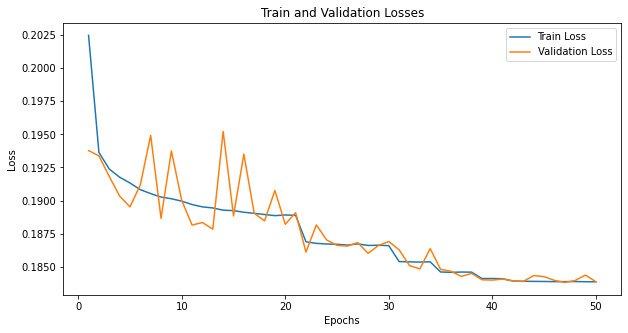

In [ ]:
import train_scheduler as train
from j_model import ShallowMLP

j_model = ShallowMLP()
j_model.to(device)

train.train(j_model, jec_dataset,num_epochs=50)

Test MSE: 0.18348954617977142


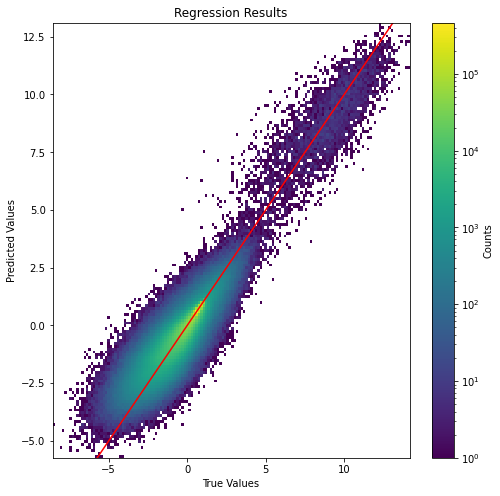

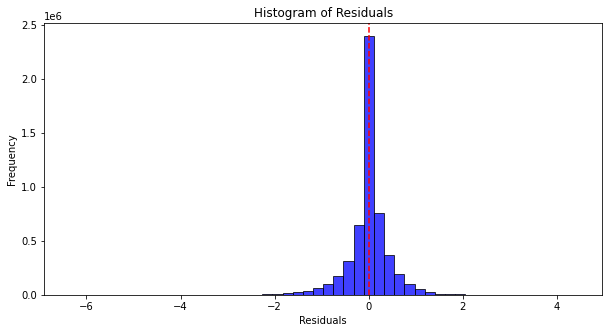

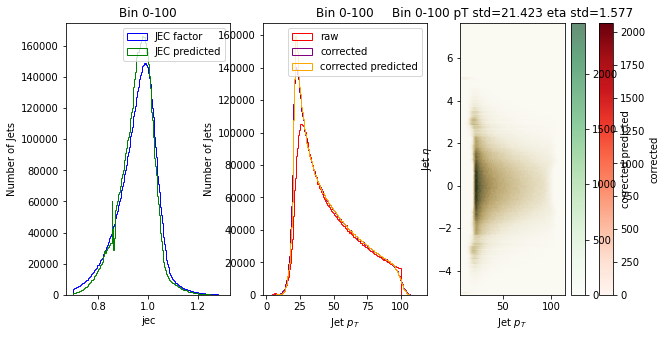

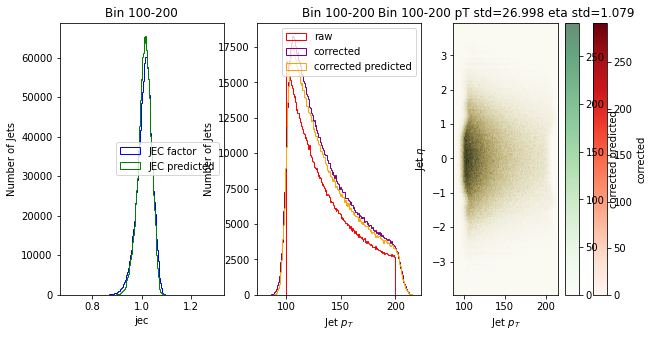

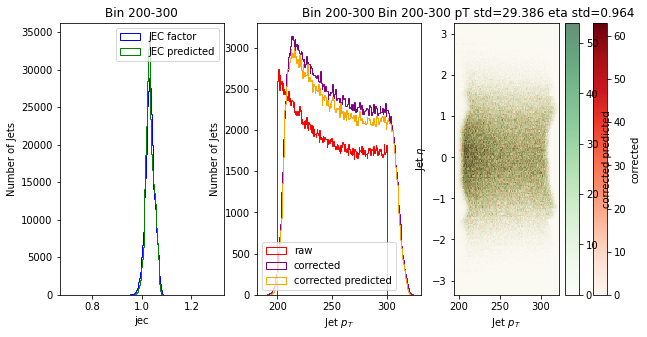

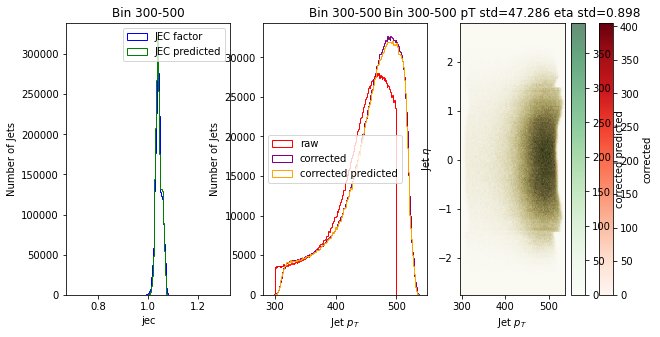

In [8]:
import importlib
import eval
importlib.reload(eval)
eval.run(jec_dataset)

In [8]:
fp = ['/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root','/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']
# Initialize empty NumPy arrays
pts_test = np.empty((0,), dtype=np.float32)
etas_test = np.empty((0,), dtype=np.float32)
area_test = np.empty((0,), dtype=np.float32)
npvs_test = np.empty((0,), dtype=np.int32)
jecs_test = np.empty((0,), dtype=np.float32)

# Load data efficiently
for current_pts_test, current_etas_test, current_area_test, current_npvs_test, current_jecs_test in load_root_files(fp):
    pts_test = np.concatenate((pts_test, np.array(current_pts_test, dtype=np.float32)))
    etas_test = np.concatenate((etas_test, np.array(current_etas_test, dtype=np.float32)))
    area_test = np.concatenate((area_test, np.array(current_area_test, dtype=np.float32)))
    npvs_test = np.concatenate((npvs_test, np.array(current_npvs_test, dtype=np.int32)))
    jecs_test = np.concatenate((jecs_test, np.array(current_jecs_test, dtype=np.float32)))

In [64]:
print(len(area_test),len(pts_test))

16248385 16248385


In [26]:
len(pts_test)

16248385

In [9]:
x=np.transpose(np.array([pts_test,etas_test,area_test,npvs_test]))
y=np.array(jecs_test)

In [10]:
from dataset import save_scaler, load_scaler
save_scaler(jec_dataset.scaler_x, jec_dataset.scaler_y)

[0.93568933 0.9123797  0.86598563 ... 1.0207542  1.043711   1.0637732 ]


/Users/dan/Documents/GitHub/ExpPro/jecs/eval_multiple_src.py:175: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.colorbar(h2[3], ax=ax[2], label='Corrected')
/Users/dan/Documents/GitHub/ExpPro/jecs/eval_multiple_src.py:175: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.colorbar(h2[3], ax=ax[2], label='Corrected')
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


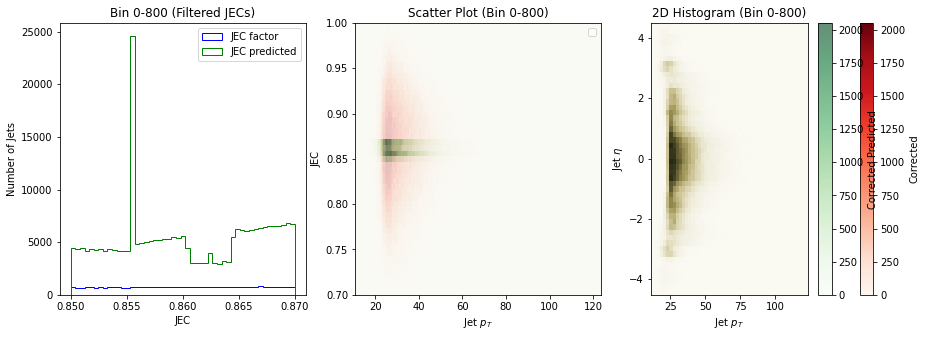

In [65]:
importlib.reload(dataset)

import eval_multiple_src as eval

importlib.reload(eval)
jec_pred, jec_bin, pts_bin, etas_bin, npvs_bin,area_bin = eval.run(x,y)


In [66]:
mask = (jec_pred==0.85543025)

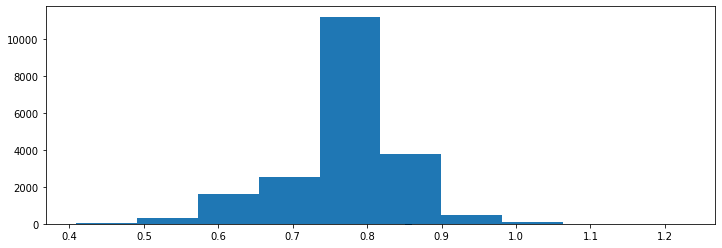

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(12,4))
ax.scatter(jec_pred[mask],pts_bin[mask])
ax.hist(area_bin[mask])
plt.show()

In [52]:
u, c = np.unique(jec_pred, return_counts = True)

In [54]:
u[c>2500]

array([0.85543025], dtype=float32)

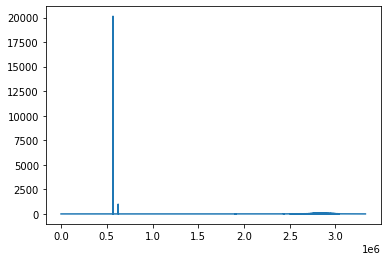

In [53]:
plt.plot(c)

In [ ]:
fp = ['/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root','/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']
# Initialize empty NumPy arrays
pts_test_second = np.empty((0,), dtype=np.float32)
etas_test_second = np.empty((0,), dtype=np.float32)
area_test_second = np.empty((0,), dtype=np.float32)
npvs_test_second = np.empty((0,), dtype=np.int32)
jecs_test_second = np.empty((0,), dtype=np.float32)

# Load data efficiently
for current_pts_test_second, current_etas_test_second, current_area_test_second, current_npvs_test_second, current_jecs_test_second in load_root_files(fp):
    pts_test_second = np.concatenate((pts_test_second, np.array(current_pts_test_second, dtype=np.float32)))
    etas_test_second = np.concatenate((etas_test_second, np.array(current_etas_test_second, dtype=np.float32)))
    area_test_second = np.concatenate((area_test_second, np.array(current_area_test_second, dtype=np.float32)))
    npvs_test_second = np.concatenate((npvs_test_second, np.array(current_npvs_test_second, dtype=np.int32)))
    jecs_test_second = np.concatenate((jecs_test_second, np.array(current_jecs_test_second, dtype=np.float32)))

In [18]:
x_second=np.transpose(np.array([pts_test_second,etas_test_second,area_test_second,npvs_test_second]))
y_second=np.array(jecs_test_second)

Test MSE: 0.14076925814151764


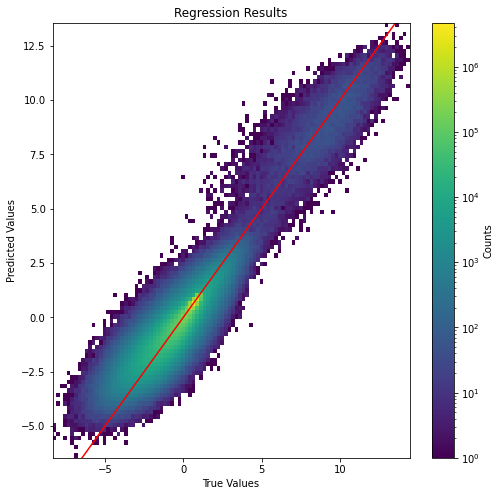

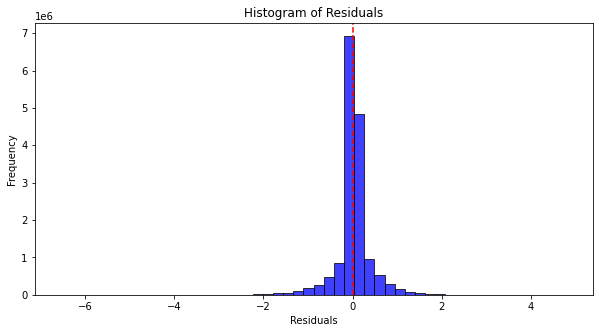

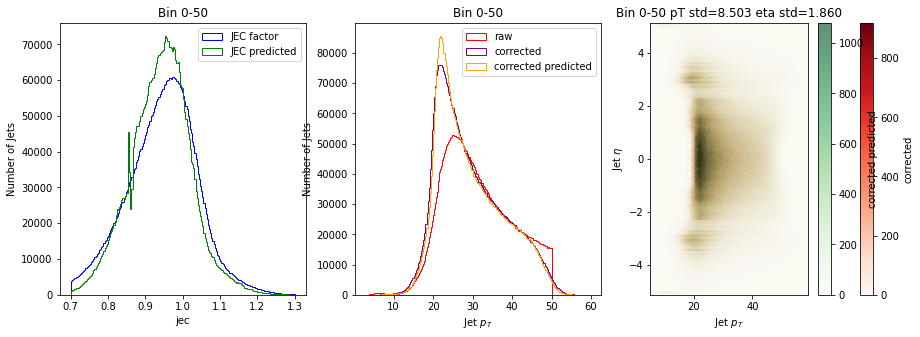

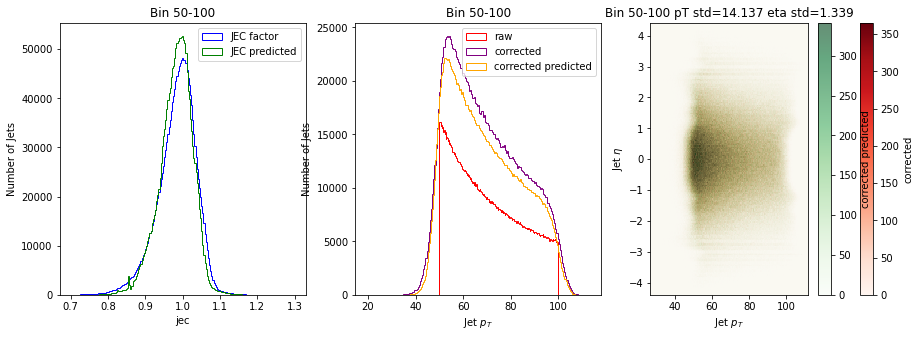

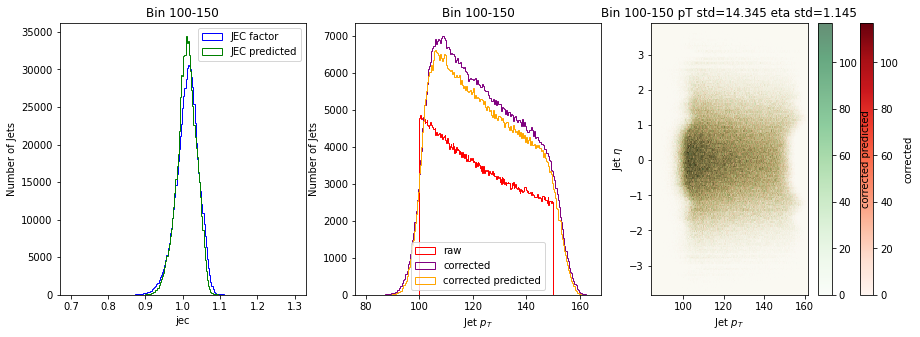

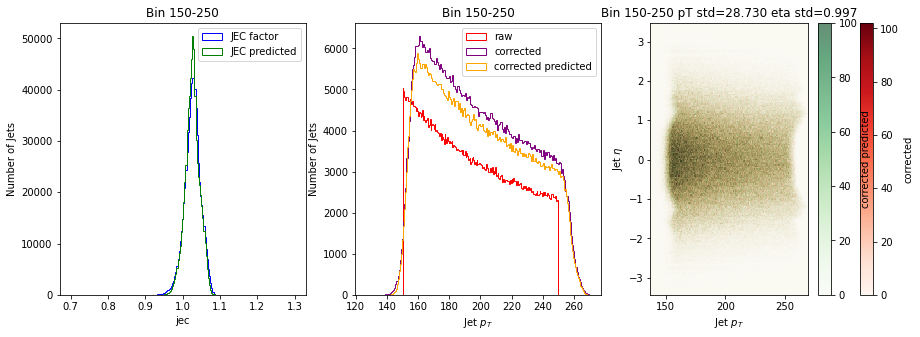

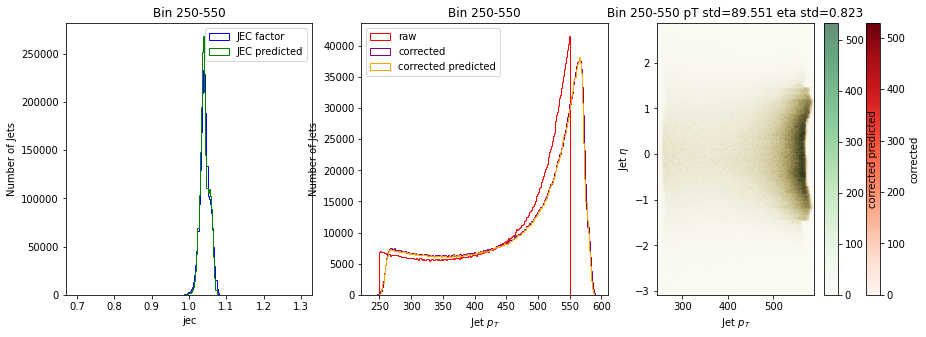

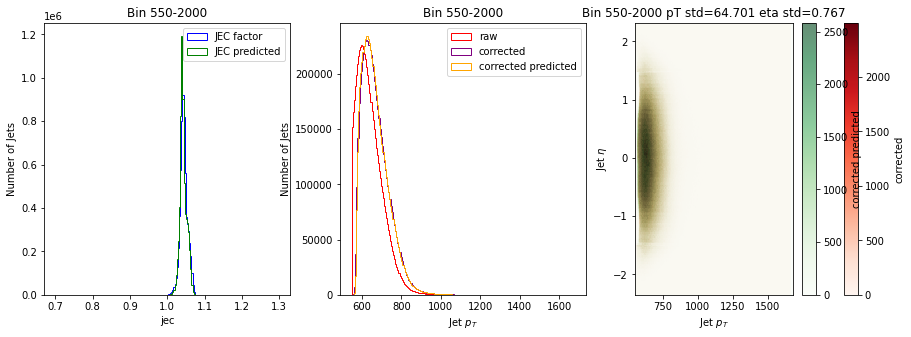

In [ ]:
importlib.reload(dataset)
import eval_specific_dataset as eval_dataset

importlib.reload(eval_dataset)
eval_dataset.run(x_second,y_second)

In [21]:
fp = ['/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root']
# Initialize empty NumPy arrays
pts_test_third = np.empty((0,), dtype=np.float32)
etas_test_third = np.empty((0,), dtype=np.float32)
area_test_third = np.empty((0,), dtype=np.float32)
npvs_test_third = np.empty((0,), dtype=np.int32)
jecs_test_third = np.empty((0,), dtype=np.float32)

# Load data efficiently
for current_pts_test_third, current_etas_test_third, current_area_test_third, current_npvs_test_third, current_jecs_test_third in load_root_files(fp):
    pts_test_third = np.concatenate((pts_test_third, np.array(current_pts_test_third, dtype=np.float32)))
    etas_test_third = np.concatenate((etas_test_third, np.array(current_etas_test_third, dtype=np.float32)))
    area_test_third = np.concatenate((area_test_third, np.array(current_area_test_third, dtype=np.float32)))
    npvs_test_third = np.concatenate((npvs_test_third, np.array(current_npvs_test_third, dtype=np.int32)))
    jecs_test_third = np.concatenate((jecs_test_third, np.array(current_jecs_test_third, dtype=np.float32)))

In [22]:
x_third=np.transpose(np.array([pts_test_third,etas_test_third,area_test_third,npvs_test_third]))
y_third=np.array(jecs_test_third)

Test MSE: 0.34306657314300537


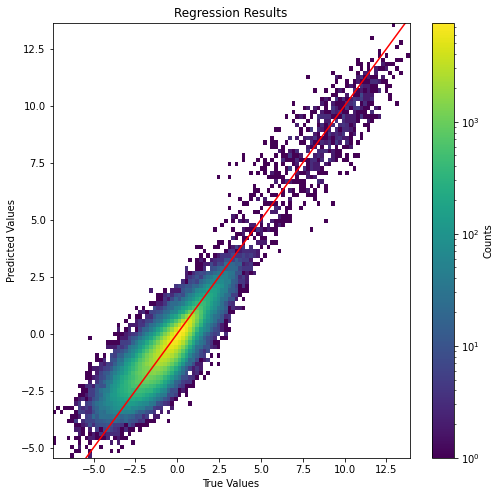

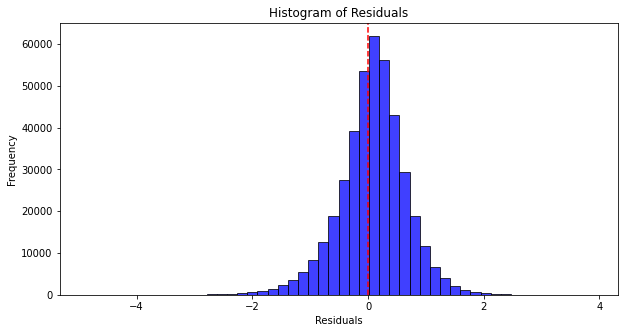

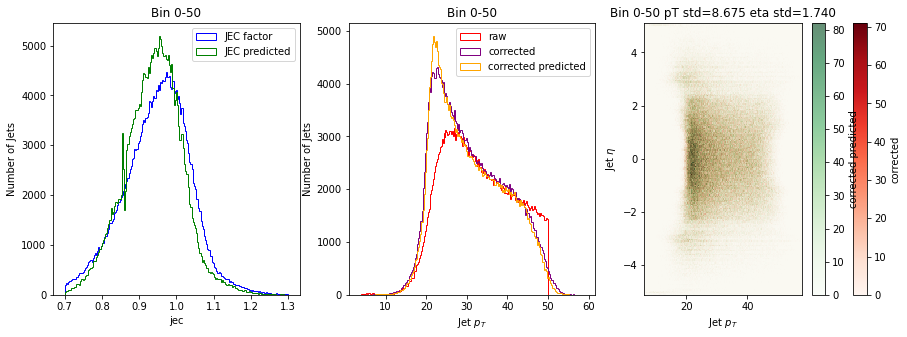

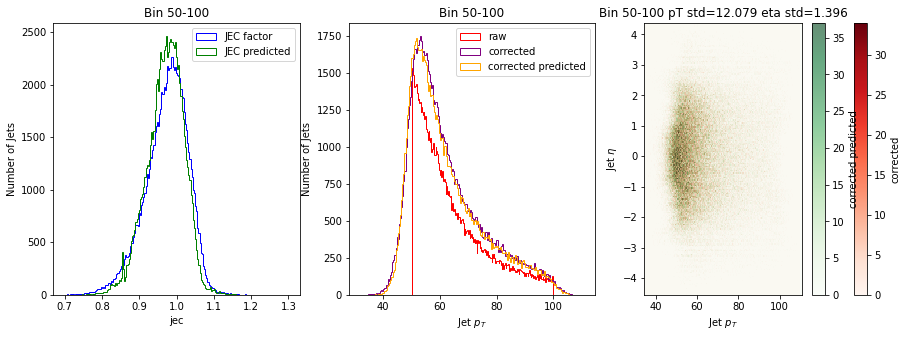

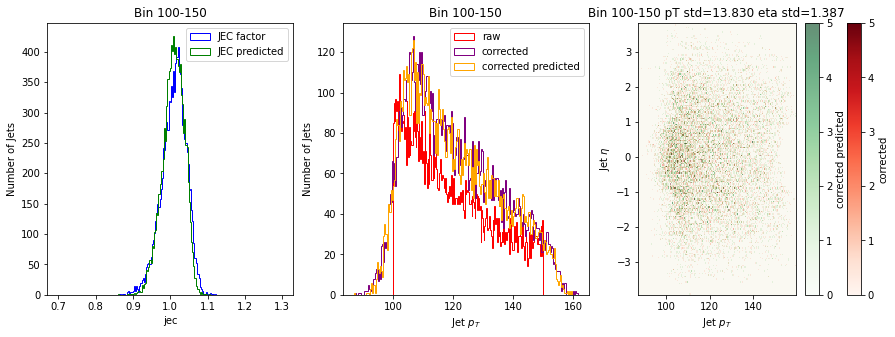

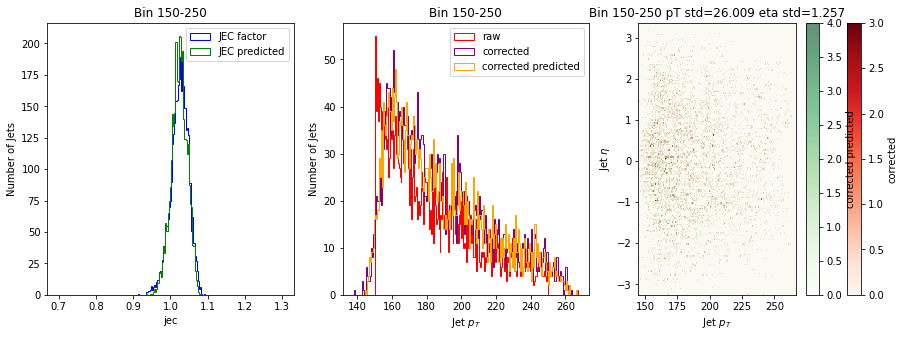

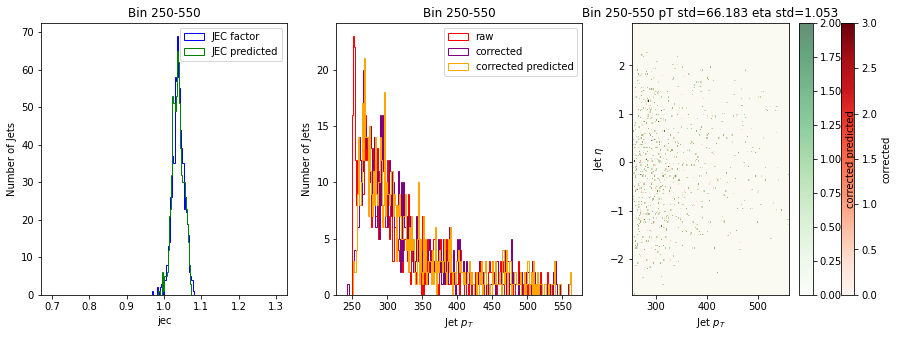

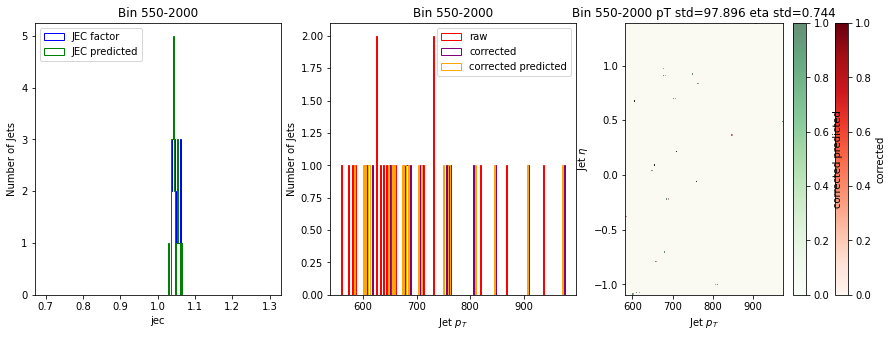

In [ ]:

importlib.reload(eval_dataset)
eval_dataset.run(x_third,y_third)

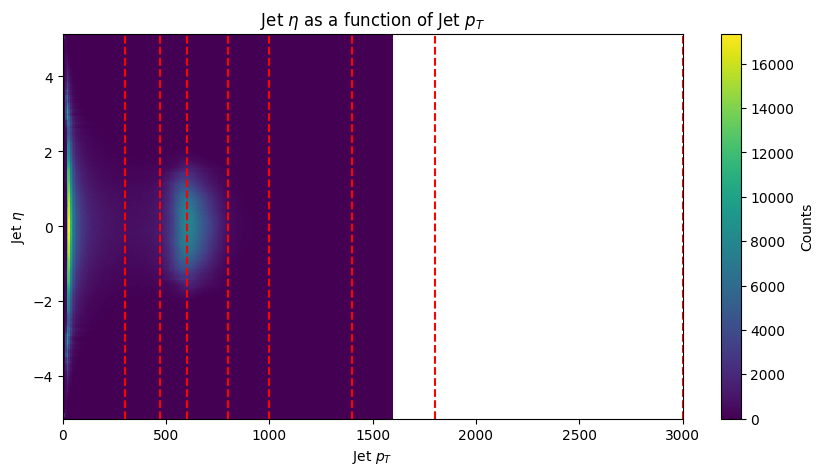

In [28]:
#not relevant to the model, just the data itself
from matplotlib import pyplot as plt
bins=np.array([300,470,600,800,1000,1400,1800,3000])

plt.figure(figsize=(10, 5))
plt.hist2d(pts2, etas2, bins=[200, 200], cmap='viridis')
plt.xlabel('Jet $p_T$')
plt.ylabel('Jet $\eta$')
plt.title('Jet $\eta$ as a function of Jet $p_T$')
plt.colorbar(label='Counts')

# Plot vertical lines for each bin value
for bin_value in bins:
    plt.axvline(x=bin_value, color='red', linestyle='--')

plt.xlim(0, 3000)

plt.show()
